In [1]:
import numpy
import flowx 
import simulation
import time
from matplotlib import pyplot
%matplotlib inline

# Dirichlet BC

In [2]:
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0
center_vars = [ 'asol', 'ivar', 'rvar', 'eror' ]
user_bc = 'dirichlet'
bc_type = { 'ivar': [ user_bc, user_bc, user_bc, user_bc ] }
bc_val  = { 'ivar': [ 0.0, 0.0, 0.0, 0.0 ] }
grid = flowx.Grid( 'cell-centered', center_vars, nx, ny, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val )

In [3]:
simulation.get_analytical( grid, 'asol', user_bc )
simulation.get_rhs( grid, 'rvar', user_bc )

In [4]:
start = time.time()
ites, res = flowx.poisson.solve_jacobi( grid, 'ivar', 'rvar', maxiter = 10000, tol = 1e-9, verbose = True )
print( time.time() - start, 'seconds' )

Jacobi method:
- Number of iterations: 1260
- Final residual: 9.90252390683895e-10
0.08353090286254883 seconds


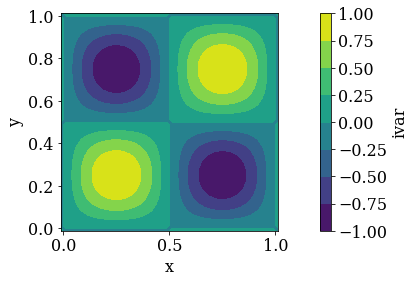

In [5]:
flowx.io.plot_contour( grid, 'ivar' )

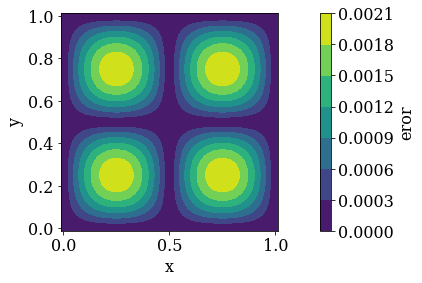

In [6]:
grid.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( grid, 'eror')

## Refine Grid

In [7]:
nx2, ny2 = 100, 100
grid2 = flowx.Grid( 'cell-centered', center_vars, nx2, ny2, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( grid2, 'asol', user_bc)
simulation.get_rhs( grid2, 'rvar', user_bc)

In [8]:
start = time.time()
ites, res = flowx.poisson.solve_jacobi( grid2, 'ivar', 'rvar', maxiter = 10000, tol = 1e-9, verbose = True )
print( time.time() - start, 'seconds' )

Jacobi method:
- Number of iterations: 6979
- Final residual: 9.995297871876693e-10
1.0319135189056396 seconds


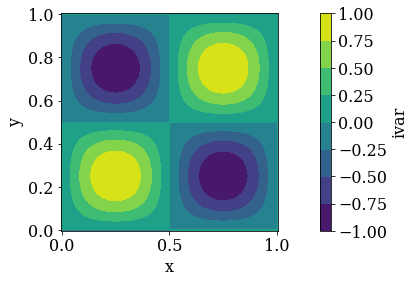

In [9]:
flowx.io.plot_contour( grid2, 'ivar' )

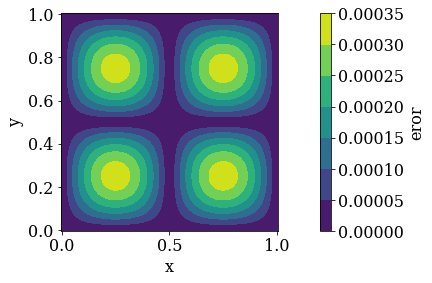

In [10]:
grid2.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( grid2, 'eror')

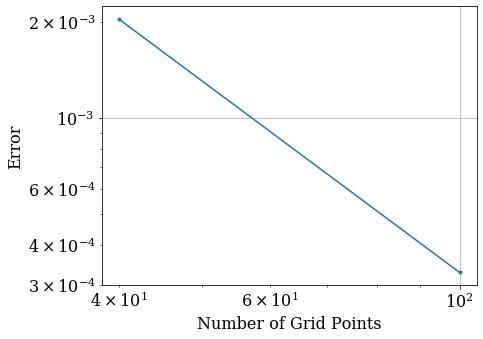

In [11]:
er = [ numpy.max( grid.get_values( 'eror' ) ), numpy.max( grid2.get_values( 'eror' ) ) ]
num_points = [ nx, nx2 ]
fig = pyplot.figure( figsize = ( 7, 5 ) )
pyplot.loglog( num_points, er, '.-' )
pyplot.xlabel( 'Number of Grid Points' )
pyplot.ylabel( 'Error' )
pyplot.grid()
pyplot.tight_layout()
fig.savefig( 'J1plot.png' );

# Neumann BC

In [12]:
user_bc = 'neumann'
bc_type = {'ivar': [user_bc, user_bc, user_bc, user_bc]}
gridN = flowx.Grid( 'cell-centered', center_vars, nx, ny, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( gridN, 'asol', user_bc)
simulation.get_rhs( gridN, 'rvar', user_bc)

In [13]:
start = time.time()
ites, res = flowx.poisson.solve_jacobi( gridN, 'ivar', 'rvar', maxiter = 10000, tol = 1e-9, verbose = True )
print( time.time() - start, 'seconds' )

Jacobi method:
- Number of iterations: 1267
- Final residual: 9.976258784260708e-10
0.08979558944702148 seconds


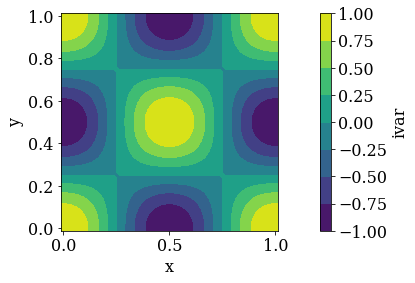

In [14]:
flowx.io.plot_contour( gridN, 'ivar' )

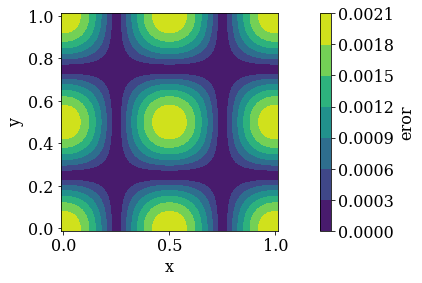

In [15]:
gridN.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( gridN, 'eror')

## Refine Grid

In [16]:
gridN2 = flowx.Grid( 'cell-centered', center_vars, nx2, ny2, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( gridN2, 'asol', user_bc)
simulation.get_rhs( gridN2, 'rvar', user_bc)

In [17]:
start = time.time()
ites, res = flowx.poisson.solve_jacobi( gridN2, 'ivar', 'rvar', maxiter = 10000, tol = 1e-9, verbose = True )
print( time.time() - start, 'seconds' )

Jacobi method:
- Number of iterations: 6999
- Final residual: 9.991689012527936e-10
1.1894443035125732 seconds


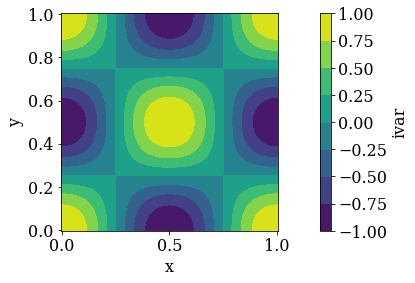

In [18]:
flowx.io.plot_contour( gridN2, 'ivar' )

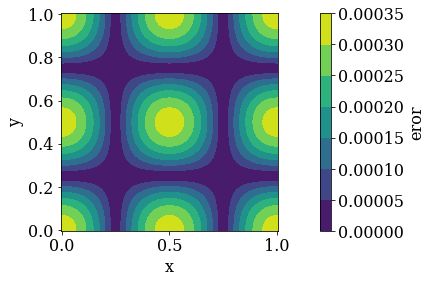

In [19]:
gridN2.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( gridN2, 'eror')

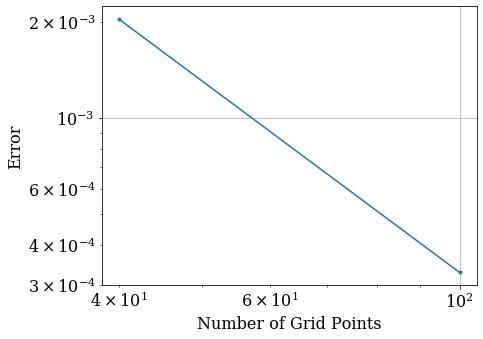

In [20]:
er = [ numpy.max( gridN.get_values( 'eror' ) ), numpy.max( gridN2.get_values( 'eror' ) ) ]
num_points = [ nx, nx2 ]
fig = pyplot.figure( figsize = ( 7, 5 ) )
pyplot.loglog( num_points, er, '.-' )
pyplot.xlabel( 'Number of Grid Points' )
pyplot.ylabel( 'Error' )
pyplot.grid()
pyplot.tight_layout()
fig.savefig('J2plot.png');